<a href="https://colab.research.google.com/github/GuyInFreezer/project-1/blob/Jay/JayColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
from ast import increment_lineno
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [3]:
from google.colab import files

In [4]:
# load the csv file that contains the mean sea level data.
uploaded=files.upload()

Saving city_1.csv to city_1 (3).csv


In [5]:
# This data is actually a Fortran IV datafile that is separated by semicolons
df = pd.read_csv("city_1.csv", sep=';', names=['date', 'height', 'ig1', 'ig2'])

# Drop the columns you don't need and make the mean sea level (variable = height) is cast as an integer
df = df[['date', 'height']]
df['height'] = df['height'].astype(int)
print(df)
df.dtypes



             date  height
0       1935.3750    6953
1       1935.4583    6971
2       1935.5417    6956
3       1935.6250    6931
4       1935.7083    7120
...           ...     ...
1047    2022.6250    7235
1048    2022.7083    7362
1049    2022.7917    7385
1050    2022.8750    7292
1051    2022.9583    7249

[1052 rows x 2 columns]


date      object
height     int64
dtype: object

In [6]:
# This datafile uses -9999 for blank data. We need to remove those results and reset the index
df = df[df['height'] >= 5000]
df = df.reset_index(drop=True)
# print(df.iloc[195:210])
print(df)
df.dtypes


             date  height
0       1935.3750    6953
1       1935.4583    6971
2       1935.5417    6956
3       1935.6250    6931
4       1935.7083    7120
...           ...     ...
1032    2022.6250    7235
1033    2022.7083    7362
1034    2022.7917    7385
1035    2022.8750    7292
1036    2022.9583    7249

[1037 rows x 2 columns]


date      object
height     int64
dtype: object

In [7]:
# The date colum is an object. This code shows the "invisible" alphanumerics - "\xa0"
# df.iloc[1015,0] for Wilmington
df.iloc[150,0]  # for Miami and Wilmington



'\xa0 1947.8750'

In [8]:
# A recheck at a different location to see if the invisible alphanumerics are the same or different
df.iloc[1,0]

'\xa0 1935.4583'

In [9]:
# Remove "\xa0" from 'date' column
df['date'] = df['date'].str.replace('\xa0 ', '')

# Convert 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'], format='%Y.%f')

# Now you have a 'date' column with datetime values including the decimal part
print(df)
print("-----------------------------------------------------")
df.dtypes


           date  height
0     1935.3750    6953
1     1935.4583    6971
2     1935.5417    6956
3     1935.6250    6931
4     1935.7083    7120
...         ...     ...
1032  2022.6250    7235
1033  2022.7083    7362
1034  2022.7917    7385
1035  2022.8750    7292
1036  2022.9583    7249

[1037 rows x 2 columns]
-----------------------------------------------------


date      object
height     int64
dtype: object

In [10]:
# Check to see if the invisible alphanumerics are gone.
# df.iloc[1010,0] for Wilmington
df.iloc[250, 0] # for Miami


'1956.2083'

In [11]:
# Change df['date'] column to float so that we can separate year from month
df['date'] = df['date'].str.strip()  # Remove leading and trailing whitespaces
df['date'] = df['date'].astype(float)  # Convert 'date' column to float
df['year'] = df['date'].astype(int)  # Extract 'year' and 'month' columns
df['month'] = (df['date'] - df['year']) * 12

# Now you have 'year' and 'month' columns, but the month variables will
# be corrected in the next cell
print(df[['date', 'year', 'month' , 'height']])


           date  year    month  height
0     1935.3750  1935   4.5000    6953
1     1935.4583  1935   5.4996    6971
2     1935.5417  1935   6.5004    6956
3     1935.6250  1935   7.5000    6931
4     1935.7083  1935   8.4996    7120
...         ...   ...      ...     ...
1032  2022.6250  2022   7.5000    7235
1033  2022.7083  2022   8.4996    7362
1034  2022.7917  2022   9.5004    7385
1035  2022.8750  2022  10.5000    7292
1036  2022.9583  2022  11.4996    7249

[1037 rows x 4 columns]


In [12]:
# The month variables need to be moved from mid-month to full month.
df['month'] = df['month'] + 0.5

# Now you have 'year' and 'month' columns
# Month is a float variable still
print(df[['date', 'year', 'month' , 'height']])


           date  year    month  height
0     1935.3750  1935   5.0000    6953
1     1935.4583  1935   5.9996    6971
2     1935.5417  1935   7.0004    6956
3     1935.6250  1935   8.0000    6931
4     1935.7083  1935   8.9996    7120
...         ...   ...      ...     ...
1032  2022.6250  2022   8.0000    7235
1033  2022.7083  2022   8.9996    7362
1034  2022.7917  2022  10.0004    7385
1035  2022.8750  2022  11.0000    7292
1036  2022.9583  2022  11.9996    7249

[1037 rows x 4 columns]


In [13]:
# Change month to an integer
df['int_month'] = round(df['month']).astype(int)
print(df[['date', 'year', 'int_month' , 'height']])



           date  year  int_month  height
0     1935.3750  1935          5    6953
1     1935.4583  1935          6    6971
2     1935.5417  1935          7    6956
3     1935.6250  1935          8    6931
4     1935.7083  1935          9    7120
...         ...   ...        ...     ...
1032  2022.6250  2022          8    7235
1033  2022.7083  2022          9    7362
1034  2022.7917  2022         10    7385
1035  2022.8750  2022         11    7292
1036  2022.9583  2022         12    7249

[1037 rows x 4 columns]


In [14]:
# Combine the year and month columns into a datetime column
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['int_month'].astype(str), format='%Y-%m')

# Print the result
print(df[['date', 'year', 'int_month', 'height', 'year_month']])


           date  year  int_month  height year_month
0     1935.3750  1935          5    6953 1935-05-01
1     1935.4583  1935          6    6971 1935-06-01
2     1935.5417  1935          7    6956 1935-07-01
3     1935.6250  1935          8    6931 1935-08-01
4     1935.7083  1935          9    7120 1935-09-01
...         ...   ...        ...     ...        ...
1032  2022.6250  2022          8    7235 2022-08-01
1033  2022.7083  2022          9    7362 2022-09-01
1034  2022.7917  2022         10    7385 2022-10-01
1035  2022.8750  2022         11    7292 2022-11-01
1036  2022.9583  2022         12    7249 2022-12-01

[1037 rows x 5 columns]


In [15]:
# Check the data types
df.dtypes

date                 float64
height                 int64
year                   int64
month                float64
int_month              int64
year_month    datetime64[ns]
dtype: object

In [16]:
# Create a new datafile that just has the datetime variable (year_month) and the depending (y) variable (height)
new_df = df[['year_month', 'height']].copy()

# Print the result
print(new_df)

     year_month  height
0    1935-05-01    6953
1    1935-06-01    6971
2    1935-07-01    6956
3    1935-08-01    6931
4    1935-09-01    7120
...         ...     ...
1032 2022-08-01    7235
1033 2022-09-01    7362
1034 2022-10-01    7385
1035 2022-11-01    7292
1036 2022-12-01    7249

[1037 rows x 2 columns]


In [17]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Same the cleaned data to a GoogleDrive
# new_df.to_csv('/content/drive/MyDrive/my_cleaned_sea_level_data.csv', index=False) - for Wilmington
new_df.to_csv('/content/drive/MyDrive/my_cleaned_sea_level_data_Miami.csv', index=False) # for Miami

In [19]:
# Remane the datetime and y-variable so that they can be used by Prophet
new_df.columns = ['ds' , 'y']
display(new_df)


,ds,y
0,1935-05-01,6953
1,1935-06-01,6971
2,1935-07-01,6956
3,1935-08-01,6931
4,1935-09-01,7120
...,...,...
1032,2022-08-01,7235
1033,2022-09-01,7362
1034,2022-10-01,7385
1035,2022-11-01,7292


In [20]:
# import M
from re import M
m = Prophet()


In [21]:
m.fit(new_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4mgbeao7/bkm791l2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4mgbeao7/echh1541.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42042', 'data', 'file=/tmp/tmp4mgbeao7/bkm791l2.json', 'init=/tmp/tmp4mgbeao7/echh1541.json', 'output', 'file=/tmp/tmp4mgbeao7/prophet_model8bcd_gbt/prophet_model-20240208232449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:24:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:24:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
# Use Prophet to make an estimate of the next 10 years worth of sea level height
future = m.make_future_dataframe(periods=120, freq='M')
display(future.tail(10))


,ds
1147,2032-02-29
1148,2032-03-31
1149,2032-04-30
1150,2032-05-31
1151,2032-06-30
1152,2032-07-31
1153,2032-08-31
1154,2032-09-30
1155,2032-10-31
1156,2032-11-30


In [23]:
# Use Prophet to forecast the height of sea level
forecast = m.predict(future)
display(forecast.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1152,2032-07-31,7426.138096,7325.050269,7546.492489,7363.621709,7487.351294,14.648584,14.648584,14.648584,14.648584,14.648584,14.648584,0.0,0.0,0.0,7440.786680
1153,2032-08-31,7427.090838,7406.358116,7637.279415,7363.404205,7489.087333,99.959933,99.959933,99.959933,99.959933,99.959933,99.959933,0.0,0.0,0.0,7527.050771
1154,2032-09-30,7428.012847,7375.006189,7607.858025,7363.146266,7490.942697,70.010641,70.010641,70.010641,70.010641,70.010641,70.010641,0.0,0.0,0.0,7498.023487
1155,2032-10-31,7428.965589,7322.097179,7543.610858,7362.479574,7492.280086,10.873171,10.873171,10.873171,10.873171,10.873171,10.873171,0.0,0.0,0.0,7439.838759
1156,2032-11-30,7429.887597,7237.676978,7472.305844,7362.458538,7493.379132,-71.604922,-71.604922,-71.604922,-71.604922,-71.604922,-71.604922,0.0,0.0,0.0,7358.282675


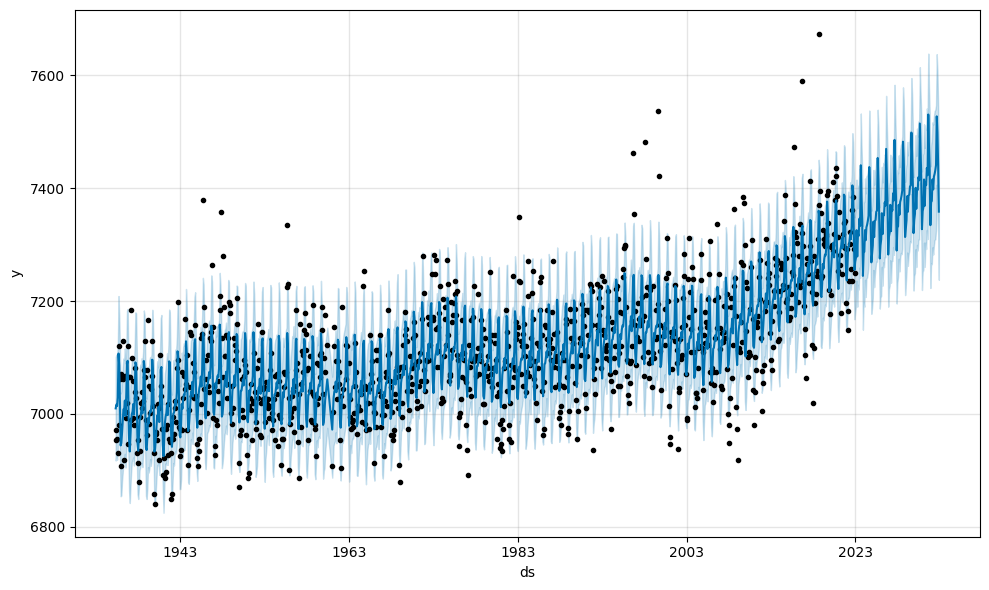

In [24]:
m.plot(forecast);


In [25]:
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1152,2032-07-31,7440.786680,7325.050269,7546.492489
1153,2032-08-31,7527.050771,7406.358116,7637.279415
1154,2032-09-30,7498.023487,7375.006189,7607.858025
1155,2032-10-31,7439.838759,7322.097179,7543.610858
1156,2032-11-30,7358.282675,7237.676978,7472.305844


In [26]:
forecast = forecast.set_index('ds')
forecast.tail(10)


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2032-02-29,7421.435852,7295.197318,7516.628424,7362.465204,7478.411178,-6.063852,-6.063852,-6.063852,-6.063852,-6.063852,-6.063852,0.0,0.0,0.0,7415.372000
2032-03-31,7422.388594,7282.335100,7512.264325,7362.796318,7480.351052,-24.807458,-24.807458,-24.807458,-24.807458,-24.807458,-24.807458,0.0,0.0,0.0,7397.581137
2032-04-30,7423.310603,7298.090861,7526.653035,7362.875847,7482.260192,-3.077432,-3.077432,-3.077432,-3.077432,-3.077432,-3.077432,0.0,0.0,0.0,7420.233171
2032-05-31,7424.263345,7308.322986,7536.648854,7363.279475,7484.078959,0.867233,0.867233,0.867233,0.867233,0.867233,0.867233,0.0,0.0,0.0,7425.130579
2032-06-30,7425.185354,7309.109552,7538.535600,7363.554000,7485.637293,6.464271,6.464271,6.464271,6.464271,6.464271,6.464271,0.0,0.0,0.0,7431.649624
2032-07-31,7426.138096,7325.050269,7546.492489,7363.621709,7487.351294,14.648584,14.648584,14.648584,14.648584,14.648584,14.648584,0.0,0.0,0.0,7440.786680
2032-08-31,7427.090838,7406.358116,7637.279415,7363.404205,7489.087333,99.959933,99.959933,99.959933,99.959933,99.959933,99.959933,0.0,0.0,0.0,7527.050771
2032-09-30,7428.012847,7375.006189,7607.858025,7363.146266,7490.942697,70.010641,70.010641,70.010641,70.010641,70.010641,70.010641,0.0,0.0,0.0,7498.023487
2032-10-31,7428.965589,7322.097179,7543.610858,7362.479574,7492.280086,10.873171,10.873171,10.873171,10.873171,10.873171,10.873171,0.0,0.0,0.0,7439.838759


<Axes: xlabel='ds'>

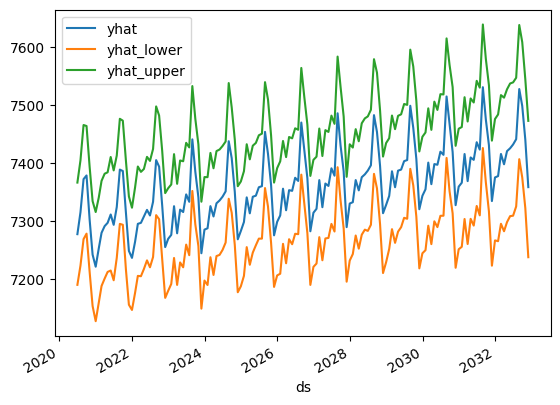

In [27]:
forecast[['yhat' , 'yhat_lower' , 'yhat_upper']].iloc[-150:,:].plot()

Bring in Temp data

In [28]:
# Now, bring in the Northern Hemisphere Temperature data from NASA.
# The first row of the csv file is complicated, so delete the first row.
# The temperature is set to a reference temperature - see README.

temps = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    parse_dates=True,
    infer_datetime_format=True
).dropna()

temps.columns = temps.iloc[0]
#temps = temps[1:]

# Review the first and last five rows of the DataFrame
display(temps.head())
display(temps.tail())

,1880,-0.34,-.49,-.22,-.29,-.05,-.15,-.16,-.24,-.21,-.29,-.40,-.38,-.27,***,***,-.18,-.19,-.30
0,1880,-0.34,-.49,-.22,-.29,-.05,-.15,-.16,-.24,-.21,-.29,-.40,-.38,-.27,***,***,-.18,-.19,-.30
1,1881,-0.29,-.22,-.03,.01,.05,-.33,.09,-.04,-.27,-.44,-.36,-.22,-.17,-.18,-.30,.01,-.09,-.35
2,1882,0.27,.22,.03,-.30,-.23,-.29,-.27,-.13,-.22,-.51,-.32,-.66,-.20,-.16,.09,-.17,-.23,-.35
3,1883,-0.56,-.65,-.14,-.27,-.23,-.12,-.03,-.21,-.31,-.15,-.41,-.14,-.27,-.31,-.62,-.22,-.12,-.29
4,1884,-0.15,-.08,-.62,-.58,-.35,-.42,-.39,-.49,-.44,-.44,-.57,-.46,-.42,-.39,-.12,-.52,-.43,-.48


,1880,-0.34,-.49,-.22,-.29,-.05,-.15,-.16,-.24,-.21,-.29,-.40,-.38,-.27,***,***,-.18,-.19,-.30
140,2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20,1.35,1.36,1.56,1.44,1.11,1.34
141,2021,1.26,.95,1.20,1.12,1.03,1.20,1.06,1.02,1.05,1.30,1.30,1.15,1.14,1.14,1.14,1.11,1.09,1.22
142,2022,1.24,1.16,1.42,1.08,1.00,1.12,1.05,1.17,1.15,1.31,1.09,1.08,1.16,1.16,1.19,1.17,1.11,1.19
143,2023,1.30,1.32,1.59,1.02,1.11,1.18,1.43,1.57,1.65,1.88,1.99,1.85,1.49,1.43,1.23,1.24,1.39,1.84
144,2024,1.62,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***


In [29]:
# Rename the columns
# Columns 1-12 are months January through December
column_names = ['Year'] + [f'{i}' for i in range(1, 19)]
temps.columns = column_names
temps

,Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1880,-0.34,-.49,-.22,-.29,-.05,-.15,-.16,-.24,-.21,-.29,-.40,-.38,-.27,***,***,-.18,-.19,-.30
1,1881,-0.29,-.22,-.03,.01,.05,-.33,.09,-.04,-.27,-.44,-.36,-.22,-.17,-.18,-.30,.01,-.09,-.35
2,1882,0.27,.22,.03,-.30,-.23,-.29,-.27,-.13,-.22,-.51,-.32,-.66,-.20,-.16,.09,-.17,-.23,-.35
3,1883,-0.56,-.65,-.14,-.27,-.23,-.12,-.03,-.21,-.31,-.15,-.41,-.14,-.27,-.31,-.62,-.22,-.12,-.29
4,1884,-0.15,-.08,-.62,-.58,-.35,-.42,-.39,-.49,-.44,-.44,-.57,-.46,-.42,-.39,-.12,-.52,-.43,-.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20,1.35,1.36,1.56,1.44,1.11,1.34
141,2021,1.26,.95,1.20,1.12,1.03,1.20,1.06,1.02,1.05,1.30,1.30,1.15,1.14,1.14,1.14,1.11,1.09,1.22
142,2022,1.24,1.16,1.42,1.08,1.00,1.12,1.05,1.17,1.15,1.31,1.09,1.08,1.16,1.16,1.19,1.17,1.11,1.19
143,2023,1.30,1.32,1.59,1.02,1.11,1.18,1.43,1.57,1.65,1.88,1.99,1.85,1.49,1.43,1.23,1.24,1.39,1.84


In [30]:
# Drop the extraneous data such as the average sesonal temperatures
temps = temps.drop(['13','14','15','16','17','18'], axis=1)
temps

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1880,-0.34,-.49,-.22,-.29,-.05,-.15,-.16,-.24,-.21,-.29,-.40,-.38
1,1881,-0.29,-.22,-.03,.01,.05,-.33,.09,-.04,-.27,-.44,-.36,-.22
2,1882,0.27,.22,.03,-.30,-.23,-.29,-.27,-.13,-.22,-.51,-.32,-.66
3,1883,-0.56,-.65,-.14,-.27,-.23,-.12,-.03,-.21,-.31,-.15,-.41,-.14
4,1884,-0.15,-.08,-.62,-.58,-.35,-.42,-.39,-.49,-.44,-.44,-.57,-.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20
141,2021,1.26,.95,1.20,1.12,1.03,1.20,1.06,1.02,1.05,1.30,1.30,1.15
142,2022,1.24,1.16,1.42,1.08,1.00,1.12,1.05,1.17,1.15,1.31,1.09,1.08
143,2023,1.30,1.32,1.59,1.02,1.11,1.18,1.43,1.57,1.65,1.88,1.99,1.85


In [31]:
# I've already dropped the na rows, but WTH, lets do it again.
temps = temps.dropna()
temps.reset_index(drop=True, inplace=True)
temps.columns

Index(['Year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [32]:
# Check the datafile
temps.index

RangeIndex(start=0, stop=145, step=1)

In [33]:
temps.head()

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1880,-0.34,-.49,-.22,-.29,-.05,-.15,-.16,-.24,-.21,-.29,-.40,-.38
1,1881,-0.29,-.22,-.03,.01,.05,-.33,.09,-.04,-.27,-.44,-.36,-.22
2,1882,0.27,.22,.03,-.30,-.23,-.29,-.27,-.13,-.22,-.51,-.32,-.66
3,1883,-0.56,-.65,-.14,-.27,-.23,-.12,-.03,-.21,-.31,-.15,-.41,-.14
4,1884,-0.15,-.08,-.62,-.58,-.35,-.42,-.39,-.49,-.44,-.44,-.57,-.46


In [34]:
# Make the date-time variable from the "Year" and "month-number" columns.
# Grab the temperature variable
len(temps)
tempdic = {}
startyear = 1880

for x in range(0, 144):
  for month in range(1, 13):
    st = f"{startyear + x}-{month}-01"
    tempdic[st] = temps.iloc[x][month]
test_df = pd.DataFrame.from_dict(tempdic, orient='index')
test_df.columns = ["Temperature"]
test_df.index = pd.to_datetime(test_df.index)
test_df

,Temperature
1880-01-01,-0.34
1880-02-01,-.49
1880-03-01,-.22
1880-04-01,-.29
1880-05-01,-.05
...,...
2023-08-01,1.57
2023-09-01,1.65
2023-10-01,1.88
2023-11-01,1.99


In [35]:
# Check to see if there are 2 columns for plotting
print(test_df)

# Turns out that, no, there is an index and only one column

           Temperature
1880-01-01       -0.34
1880-02-01        -.49
1880-03-01        -.22
1880-04-01        -.29
1880-05-01        -.05
...                ...
2023-08-01        1.57
2023-09-01        1.65
2023-10-01        1.88
2023-11-01        1.99
2023-12-01        1.85

[1728 rows x 1 columns]


In [36]:
# Take the index and make it a real column.
# This column is the date-time variable.
test_df.reset_index(inplace=True)
print(test_df)

          index Temperature
0    1880-01-01       -0.34
1    1880-02-01        -.49
2    1880-03-01        -.22
3    1880-04-01        -.29
4    1880-05-01        -.05
...         ...         ...
1723 2023-08-01        1.57
1724 2023-09-01        1.65
1725 2023-10-01        1.88
1726 2023-11-01        1.99
1727 2023-12-01        1.85

[1728 rows x 2 columns]


In [37]:
# Send the cleaned data to GoogleDrive
test_df.to_csv('/content/drive/MyDrive/my_cleaned_northern_hemisphere_temp.csv', index=False)

In [38]:
# Create a datetime (= x-axis) and y-axis variables
test_df.columns = ['ds' , 'y']
display(test_df)

,ds,y
0,1880-01-01,-0.34
1,1880-02-01,-.49
2,1880-03-01,-.22
3,1880-04-01,-.29
4,1880-05-01,-.05
...,...,...
1723,2023-08-01,1.57
1724,2023-09-01,1.65
1725,2023-10-01,1.88
1726,2023-11-01,1.99


In [39]:
from re import M
m = Prophet()

In [40]:
m.fit(test_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4mgbeao7/v4dlo_ic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4mgbeao7/rf42d8as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4303', 'data', 'file=/tmp/tmp4mgbeao7/v4dlo_ic.json', 'init=/tmp/tmp4mgbeao7/rf42d8as.json', 'output', 'file=/tmp/tmp4mgbeao7/prophet_model7ghmkiue/prophet_model-20240208232452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:24:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
# Set the future dates to be estimated to be 10 years by month
future = m.make_future_dataframe(periods=120, freq='M')
display(future.tail(10))


,ds
1838,2033-02-28
1839,2033-03-31
1840,2033-04-30
1841,2033-05-31
1842,2033-06-30
1843,2033-07-31
1844,2033-08-31
1845,2033-09-30
1846,2033-10-31
1847,2033-11-30


In [42]:
# Forecast the data for the next 10 years
forecast = m.predict(future)
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1843,2033-07-31,1.575574,1.309854,1.867275,1.549459,1.604923,0.008050,0.008050,0.008050,0.008050,0.008050,0.008050,0.0,0.0,0.0,1.583624
1844,2033-08-31,1.578113,1.285786,1.846110,1.551687,1.607921,-0.019346,-0.019346,-0.019346,-0.019346,-0.019346,-0.019346,0.0,0.0,0.0,1.558767
1845,2033-09-30,1.580569,1.351089,1.916422,1.553817,1.610881,0.059124,0.059124,0.059124,0.059124,0.059124,0.059124,0.0,0.0,0.0,1.639693
1846,2033-10-31,1.583107,1.336001,1.893307,1.556039,1.613853,0.020503,0.020503,0.020503,0.020503,0.020503,0.020503,0.0,0.0,0.0,1.603610
1847,2033-11-30,1.585564,1.243934,1.773285,1.557928,1.616814,-0.083241,-0.083241,-0.083241,-0.083241,-0.083241,-0.083241,0.0,0.0,0.0,1.502323


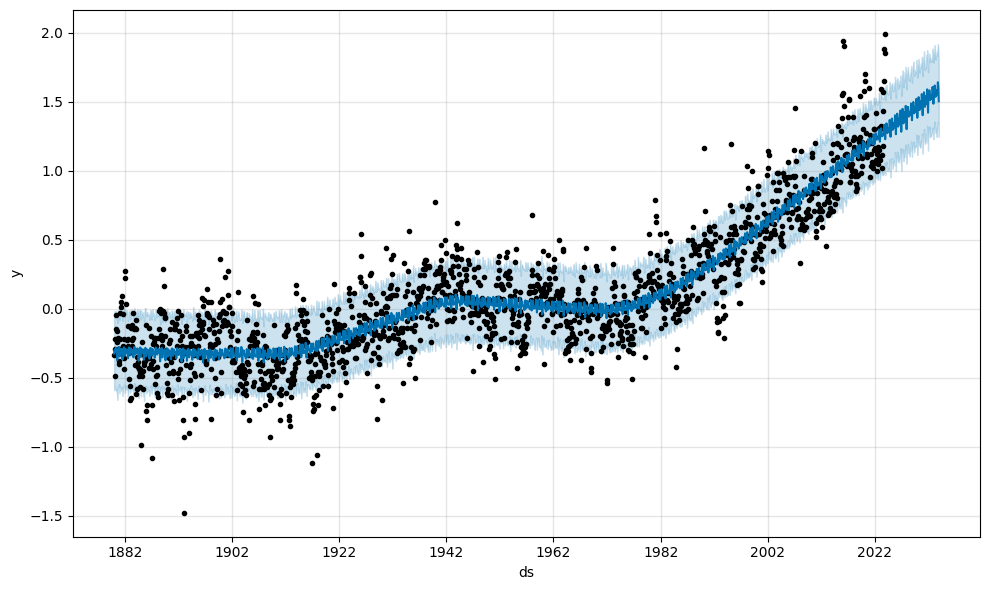

In [43]:
m.plot(forecast);

In [44]:
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1843,2033-07-31,1.583624,1.309854,1.867275
1844,2033-08-31,1.558767,1.285786,1.846110
1845,2033-09-30,1.639693,1.351089,1.916422
1846,2033-10-31,1.603610,1.336001,1.893307
1847,2033-11-30,1.502323,1.243934,1.773285


In [45]:
forecast = forecast.set_index('ds')
forecast.tail(10)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2033-02-28,1.563047,1.355146,1.908463,1.538403,1.590246,0.053373,0.053373,0.053373,0.053373,0.053373,0.053373,0.0,0.0,0.0,1.616419
2033-03-31,1.565585,1.297927,1.847395,1.540778,1.593261,0.002922,0.002922,0.002922,0.002922,0.002922,0.002922,0.0,0.0,0.0,1.568507
2033-04-30,1.568041,1.271385,1.806719,1.543082,1.596211,-0.033677,-0.033677,-0.033677,-0.033677,-0.033677,-0.033677,0.0,0.0,0.0,1.534364
2033-05-31,1.570580,1.278870,1.839197,1.545318,1.599148,-0.014817,-0.014817,-0.014817,-0.014817,-0.014817,-0.014817,0.0,0.0,0.0,1.555762
2033-06-30,1.573036,1.244180,1.829475,1.547346,1.601977,-0.027164,-0.027164,-0.027164,-0.027164,-0.027164,-0.027164,0.0,0.0,0.0,1.545872
2033-07-31,1.575574,1.309854,1.867275,1.549459,1.604923,0.008050,0.008050,0.008050,0.008050,0.008050,0.008050,0.0,0.0,0.0,1.583624
2033-08-31,1.578113,1.285786,1.846110,1.551687,1.607921,-0.019346,-0.019346,-0.019346,-0.019346,-0.019346,-0.019346,0.0,0.0,0.0,1.558767
2033-09-30,1.580569,1.351089,1.916422,1.553817,1.610881,0.059124,0.059124,0.059124,0.059124,0.059124,0.059124,0.0,0.0,0.0,1.639693
2033-10-31,1.583107,1.336001,1.893307,1.556039,1.613853,0.020503,0.020503,0.020503,0.020503,0.020503,0.020503,0.0,0.0,0.0,1.603610


<Axes: xlabel='ds'>

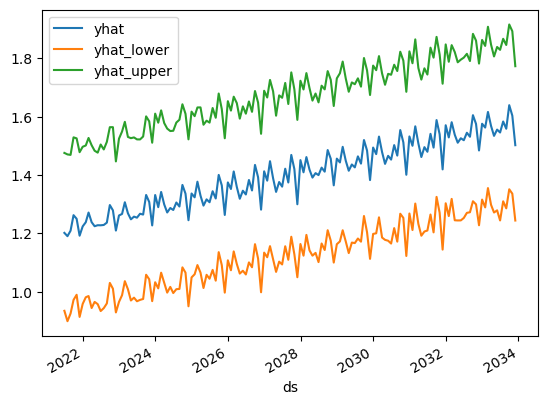

In [46]:
forecast[['yhat' , 'yhat_lower' , 'yhat_upper']].iloc[-150:,:].plot()

Compare sea level rise and temp

In [47]:
# Try to get a correlation for temperature (test_df) and sea level (new_df)
# Merge DataFrames based on datetime_column with an inner join
combined_df = pd.merge(new_df, test_df, on='ds', how='inner')

# Print the combined DataFrame
print(combined_df)

             ds   y_x   y_y
0    1935-05-01  6953  -.28
1    1935-06-01  6971  -.14
2    1935-07-01  6956  -.04
3    1935-08-01  6931  -.07
4    1935-09-01  7120  -.06
...         ...   ...   ...
1032 2022-08-01  7235  1.17
1033 2022-09-01  7362  1.15
1034 2022-10-01  7385  1.31
1035 2022-11-01  7292  1.09
1036 2022-12-01  7249  1.08

[1037 rows x 3 columns]


In [48]:
# Rename the columns
combined_df = combined_df.rename(columns={ 'ds':'year_month_day', 'y_x':'sea_level_mm' , 'y_y':'temp_C' })
print(combined_df)

     year_month_day  sea_level_mm temp_C
0        1935-05-01          6953   -.28
1        1935-06-01          6971   -.14
2        1935-07-01          6956   -.04
3        1935-08-01          6931   -.07
4        1935-09-01          7120   -.06
...             ...           ...    ...
1032     2022-08-01          7235   1.17
1033     2022-09-01          7362   1.15
1034     2022-10-01          7385   1.31
1035     2022-11-01          7292   1.09
1036     2022-12-01          7249   1.08

[1037 rows x 3 columns]


In [49]:
combined_df ['temp_C']= combined_df['temp_C'].astype(float)
combined_df.dtypes


year_month_day    datetime64[ns]
sea_level_mm               int64
temp_C                   float64
dtype: object

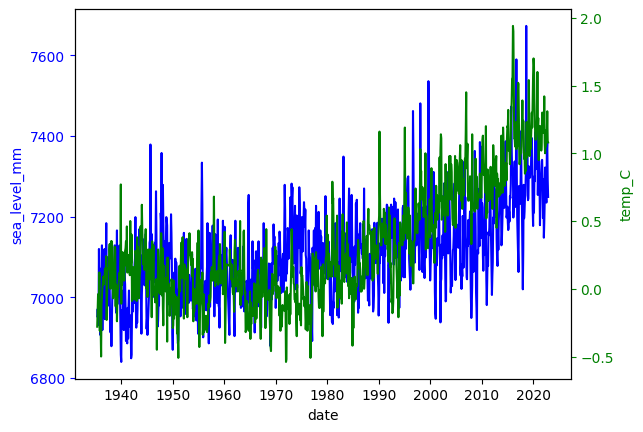

In [50]:
# Make a combined plot so that we can visually compare the sea level rise to temperature change
import matplotlib.pyplot as plt

# Plot the variables on two graphs with shared x-axis
fig, ax1 = plt.subplots()

# Plotting the first variable on the first graph
ax1.plot(combined_df['year_month_day'], combined_df['sea_level_mm'], color='blue', label='sea_level_mm')
ax1.set_xlabel('date')
ax1.set_ylabel('sea_level_mm', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the second variable
ax2 = ax1.twinx()
ax2.plot(combined_df['year_month_day'], combined_df['temp_C'], color='green', label='temp_C')
ax2.set_ylabel('temp_C', color='green')
ax2.tick_params('y', colors='green')

# Display the plot
plt.show()

In [51]:
# Determine the coooelation coefficient
from scipy import stats as st
var_sea_level = combined_df['sea_level_mm']
var_temp = combined_df['temp_C']
correlation = st.pearsonr(var_sea_level, var_temp)
r = round(correlation[0],2)
print(f'Correlation r = {r}')


Correlation r = 0.5


In [52]:
# Calculate the correlation coefficient and print the results.
correlation_coefficient = combined_df['sea_level_mm'].corr(combined_df['temp_C'])

# Print the result
print(f"Correlation Coefficient between Sea Level (in mm) and Northern Hemisphere Temperature change (C): {correlation_coefficient}")


Correlation Coefficient between Sea Level (in mm) and Northern Hemisphere Temperature change (C): 0.49982196080834185


In [54]:
# This section of code will compare the Wilmington (city1) sea level rise to Miami (city2) sea level rise.
# load the csv file that contains the mean sea level data.
uploaded=files.upload()

Saving city_2.csv to city_2.csv


In [55]:
# This section of code will clean the data for the second city - Miami.
# Since we know how to clean the data, we will not print out intermediary stuff
df = pd.read_csv("city_2.csv", sep=';', names=['date', 'height', 'ig1', 'ig2'])
df = df[['date', 'height']]
df['height'] = df['height'].astype(int)
df = df[df['height'] >= 5000]
df = df.reset_index(drop=True)
df['date'] = df['date'].str.replace('\xa0 ', '')
df['date'] = df['date'].str.strip()  # Remove leading and trailing whitespaces
df['date'] = df['date'].astype(float)  # Convert 'date' column to float
df['year'] = df['date'].astype(int)  # Extract 'year' and 'month' columns
df['month'] = (df['date'] - df['year']) * 12
df['month'] = df['month'] + 0.5
df['int_month'] = round(df['month']).astype(int)
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['int_month'].astype(str), format='%Y-%m')
city_2_df = df[['year_month', 'height']].copy()
city_2_df.columns = ['ds' , 'y']


In [56]:
# Merge city_1_df to city_2_df on datetime
cities_df = pd.merge(new_df, city_2_df, on='ds', how='inner')
print(cities_df)

            ds   y_x   y_y
0   1994-02-01  7059  5895
1   1994-03-01  7163  5847
2   1994-04-01  7041  5815
3   1994-05-01  7151  5937
4   1994-06-01  7099  5869
..         ...   ...   ...
335 2022-08-01  7235  6084
336 2022-09-01  7362  6222
337 2022-10-01  7385  6306
338 2022-11-01  7292  6292
339 2022-12-01  7249  6191

[340 rows x 3 columns]


In [57]:
# Rename the columns
cities_df = cities_df.rename(columns={ 'ds':'year_month_day', 'y_x':'City1' , 'y_y':'City2' })
print(cities_df)

    year_month_day  City1  City2
0       1994-02-01   7059   5895
1       1994-03-01   7163   5847
2       1994-04-01   7041   5815
3       1994-05-01   7151   5937
4       1994-06-01   7099   5869
..             ...    ...    ...
335     2022-08-01   7235   6084
336     2022-09-01   7362   6222
337     2022-10-01   7385   6306
338     2022-11-01   7292   6292
339     2022-12-01   7249   6191

[340 rows x 3 columns]


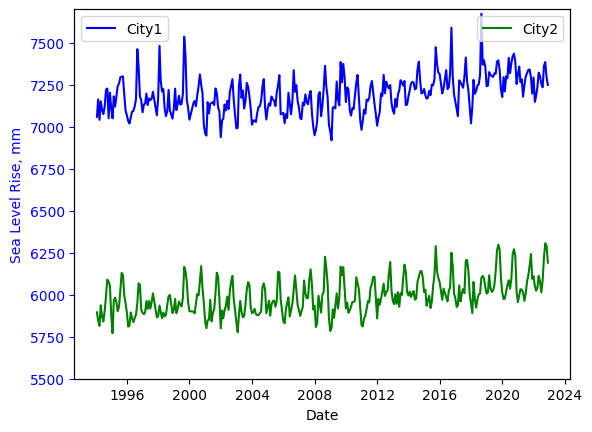

In [67]:
# Make a combined plot so that we can visually compare the sea level rise to temperature change
import matplotlib.pyplot as plt

# Plot the variables on two graphs with shared x-axis
fig, ax1 = plt.subplots()

# Plotting the first variable on the first graph
ax1.plot(cities_df['year_month_day'], cities_df['City1'], color='blue', label='City1')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sea Level Rise, mm', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_ylim(5500,7700)
ax1.legend(loc="best")

# Create a second y-axis for the second variable
ax2 = ax1.twinx()
ax2.plot(cities_df['year_month_day'], cities_df['City2'], color='green', label='City2')
ax2.set_ylabel('Sea Level Rise, mm', color='green')
ax2.tick_params('y', colors='green')
ax2.set_ylim(5500,7700)
ax2.get_yaxis().set_visible(False)
ax2.legend(loc="best")

# Display the plot
plt.show()

In [59]:
# Determine the coooelation coefficient
from scipy import stats as st
sea_level_rise_city1 = cities_df['City1']
sea_level_rise_city2 = cities_df['City2']
correlation = st.pearsonr(sea_level_rise_city1, sea_level_rise_city2)
r = round(correlation[0],2)
print(f'Correlation r = {r}')

Correlation r = 0.74
